In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [26]:
x = np.loadtxt('data/f150_motor_distributors.txt',delimiter=',',dtype=float)
x.shape

(5000, 2)

## Question 1

### 1a

In [5]:
def my_kmeans(xs: np.ndarray, init_centers: np.ndarray, n_iter=100):
    N,D = xs.shape
    K = init_centers.shape[0]
    final_centers = init_centers
    
    for it in range(n_iter):
        dist = cdist(xs,final_centers)
        cluster_id = np.argmin(dist,axis=1)
            
        for i in range(K):
            final_centers[i,:] = np.mean(xs[cluster_id==i],axis=0)    
            
    dist = cdist(xs,final_centers)
    cluster_id = np.argmin(dist,axis=1)
    return final_centers,cluster_id

### 1b

In [11]:
data = np.array([[10,10],[-10,-10],[2,2],[3,3],[-3,-3]])
centroids,cluster_id = my_kmeans(x,data)

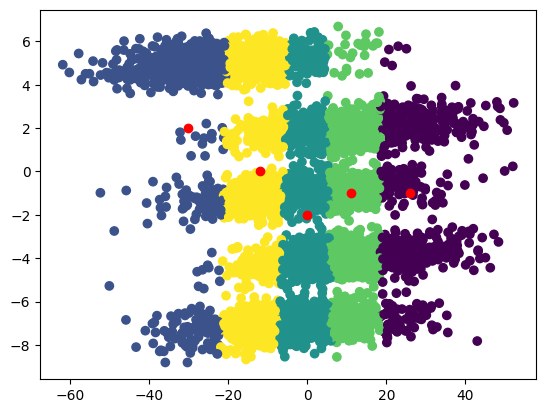

In [12]:
plt.scatter(x[:,0],x[:,1],c=cluster_id)
plt.scatter(centroids[:,0],centroids[:,1],c='r')
plt.show()

### 1c

From the data scatter plot, we can see that the data's distribution are five short strips and each strip is a cluster. Therefore, we choose k=5 as the clustering number. 


When we draw the resulting clusters, we can see that the result breaks the original distribution of data and it cuts each strip into five parts. Therefore, it doesn't cluster well.


There is not an initialiation that would make it cluster well. Kmeans can't do well in such shape of data.

## Question 2

### 2a

In [29]:
def new_kmeans(xs, init_centers, V, n_iter=100):
    N,D = xs.shape
    K = init_centers.shape[0]
    final_centers = init_centers
    
    for it in range(n_iter):
        dist = cdist(xs,final_centers,metric='mahalanobis', VI=V)
        cluster_id = np.argmin(dist,axis=1)
            
        for i in range(K):
            final_centers[i,:] = np.mean(xs[cluster_id==i],axis=0)    
            
    dist = cdist(xs,final_centers,metric='mahalanobis', VI=V)
    cluster_id = np.argmin(dist,axis=1)
    return final_centers,cluster_id

In [30]:
p = np.array([[10,0.5],[-10,0.25]])
new_centroids,new_cluster_id = new_kmeans(x,data,p)

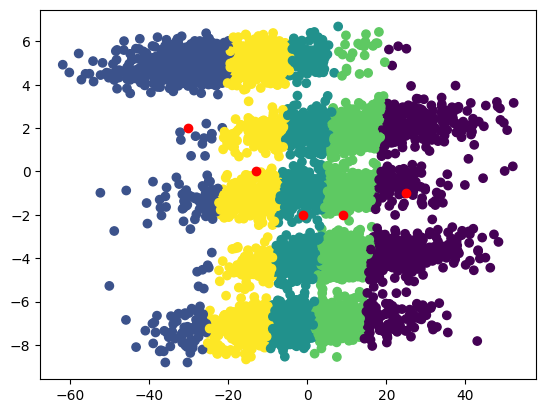

In [35]:
plt.scatter(x[:,0],x[:,1],c=new_cluster_id)
plt.scatter(new_centroids[:,0],new_centroids[:,1],c='r')
plt.show()

### 2b

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)
pca.fit(x)
pca.components_

array([[-0.99838317,  0.05684225],
       [-0.05684225, -0.99838317]])

### 2c

In [45]:
for i in range(5):
    pca_1 = PCA(n_components=2)
    pca_1.fit(x[new_cluster_id==i])
    print(f'For cluster {i},the compenents are:{pca_1.components_}')

For cluster 0,the compenents are:[[ 0.98785918  0.15535201]
 [ 0.15535201 -0.98785918]]
For cluster 1,the compenents are:[[-0.99998828 -0.00484071]
 [ 0.00484071 -0.99998828]]
For cluster 2,the compenents are:[[ 0.63918441  0.7690535 ]
 [-0.7690535   0.63918441]]
For cluster 3,the compenents are:[[ 0.80717127  0.59031732]
 [-0.59031732  0.80717127]]
For cluster 4,the compenents are:[[-0.65329384 -0.75710445]
 [-0.75710445  0.65329384]]


### 2d

In [46]:
val,vec = np.linalg.eig(p.T)
A = np.diag(val)
p_new = A@vec
p_new

array([[9.44301625, 6.95724558],
       [0.04300577, 0.53717161]])

In [47]:
val,vec

(array([9.45693086, 0.79306914]),
 array([[0.99852863, 0.7356769 ],
        [0.05422701, 0.67733264]]))